In [1]:
!pip install keras
!pip install tensorflow
!pip install tensorflow_datasets

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras import backend as K

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Reshape based on backend image format
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


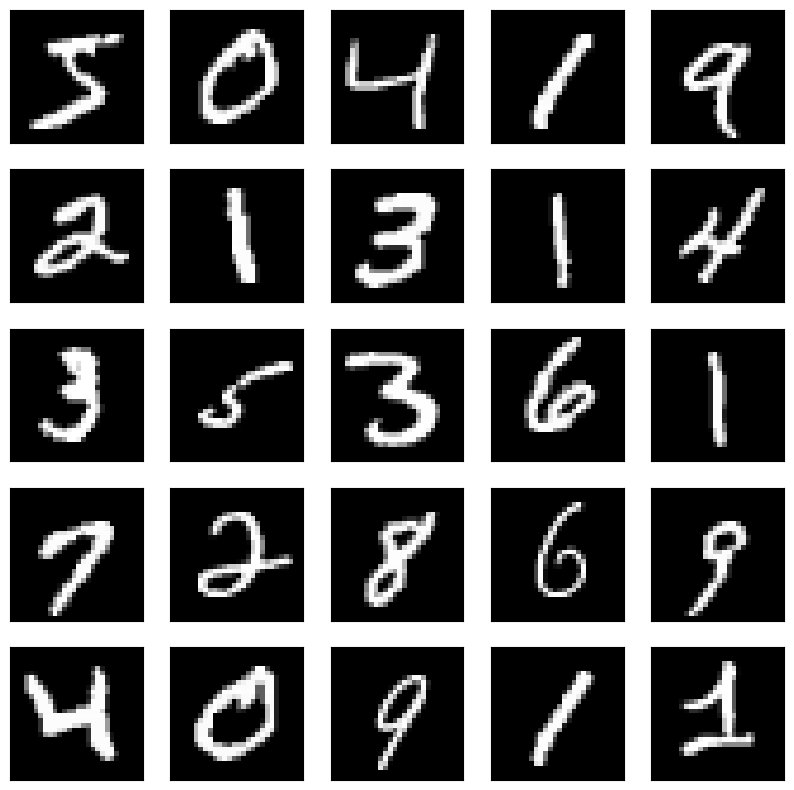

In [4]:
# Normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Show some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
plt.show()

In [5]:
# Build CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

# Compile model
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train model
training_history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=12,
    verbose=1,
    validation_data=(x_test, y_test)
)

# Prediction and comparison
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)[:5]
label = np.argmax(y_test, axis=1)[:5]

print("Predicted labels:", pred)
print("True labels     :", label)

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 302ms/step - accuracy: 0.8448 - loss: 0.5022 - precision: 0.9140 - recall: 0.7798 - val_accuracy: 0.9820 - val_loss: 0.0570 - val_precision: 0.9851 - val_recall: 0.9789
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 132s 281ms/step - accuracy: 0.9723 - loss: 0.0942 - precision: 0.9773 - recall: 0.9681 - val_accuracy: 0.9879 - val_loss: 0.0364 - val_precision: 0.9892 - val_recall: 0.9858
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 132s 282ms/step - accuracy: 0.9805 - loss: 0.0632 - precision: 0.9834 - recall: 0.9782 - val_accuracy: 0.9889 - val_loss: 0.0321 - val_precision: 0.9906 - val_recall: 0.9879
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 147s 293ms/step - accuracy: 0.9840 - loss: 0.0514 - precision: 0.9864 - recall: 0.9824 - val_accuracy: 0.9888 - val_loss: 0.0332 - val_precision: 0.9901 - val_recall: 0.9880
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 137s 283ms/step - accuracy: 0.9860 - loss: 0.0451 - precision: 0.9879 - recall: 0.9844 - val_accuracy: 0

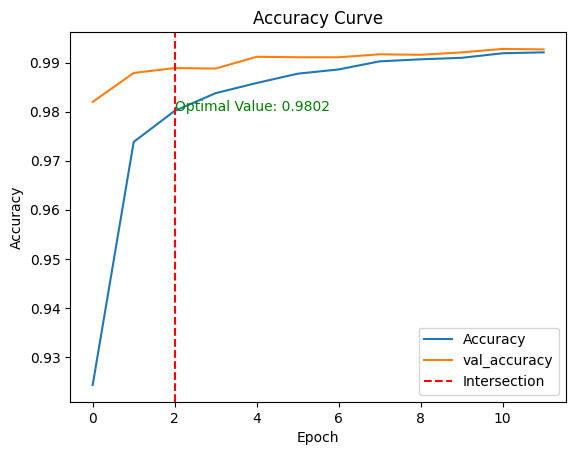

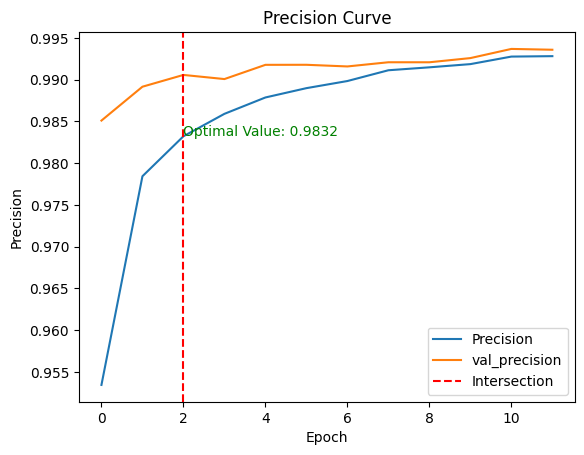

In [10]:
# Function to show performance curve
def show_performance_curve(training_result, metric, metric_label):
    train_perf = training_result.history[metric]
    validation_perf = training_result.history['val_' + metric]
    intersection_idx = np.argwhere(np.isclose(train_perf, validation_perf, atol=1e-2)).flatten()
    intersection_idx = intersection_idx[0] if len(intersection_idx) > 0 else -1
    intersection_value = train_perf[intersection_idx] if intersection_idx != -1 else None

    plt.figure()
    plt.plot(train_perf, label=metric_label)
    plt.plot(validation_perf, label='val_' + metric)
    if intersection_value:
        plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')
        plt.annotate(f'Optimal Value: {intersection_value:.4f}',
                     xy=(intersection_idx, intersection_value),
                     xycoords='data',
                     fontsize=10,
                     color='green')
    plt.xlabel('Epoch')
    plt.ylabel(metric_label)
    plt.legend(loc='lower right')
    plt.title(f'{metric_label} Curve')
    plt.show()

show_performance_curve(training_history, 'accuracy', 'Accuracy')
show_performance_curve(training_history, 'precision', 'Precision')

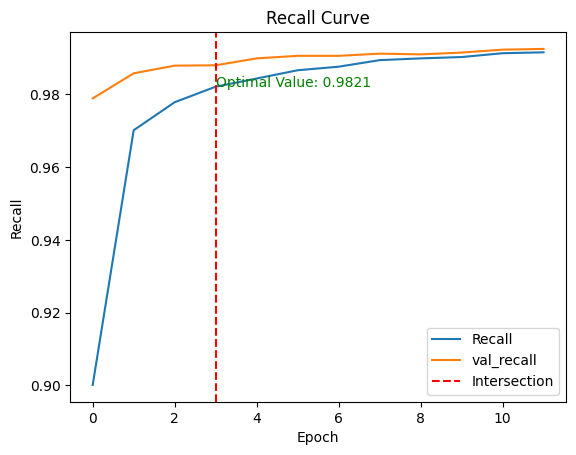

Test loss: 0.026362191885709763
Test accuracy: 0.9926999807357788


In [11]:
show_performance_curve(training_history, 'recall', 'Recall')
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step


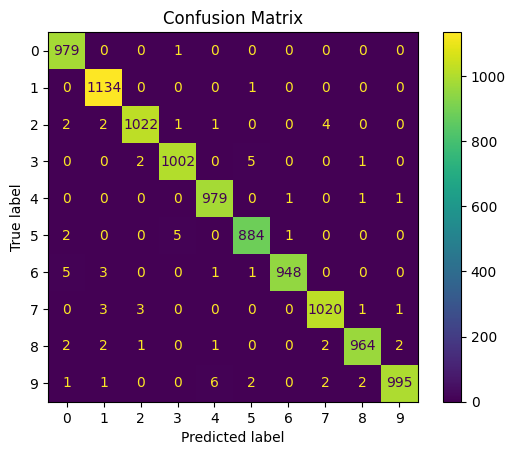

In [12]:
# Confusion Matrix
test_predictions = model.predict(x_test)
test_predicted_labels = np.argmax(test_predictions, axis=1)
test_true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot(include_values=True, cmap='viridis')
plt.title("Confusion Matrix")
plt.show()